# Optimal Portfolio of a risk-free and two risky assets

## Investors Details

|Expected Return | Risk Aversion | Risk | VaR| Investment Horizon | 
|----------------|---------------|-------|---|-------------------|
|12% | Moderate | 20% | .02| 5 years|

## Risky Assets Selection

### Constants for the market

In [1]:
#risk free rate
rf_rate = .0923
coeff_A = 3.09

### Importing the necessary libraries

In [2]:
import pandas as pd
import missingno as msno
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sns

### Importing historical stocks data of DSE

In [3]:
df = pd.read_csv('../data/total_daily_data.csv', header = 0)
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis=1)
df.info()

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-02-03 to 2019-06-30
Data columns (total 6 columns):
symbol    995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(3)
memory usage: 41.8+ MB


In [4]:
df_sorted = df.sort_index()
df_sorted.tail(10)

,symbol,open,high,low,close,volume
date,,,,,,
2019-08-29,BATBC,1224.0,1230.00,1205,1209.80,32499
2019-08-29,METROSPIN,7.7,7.80,7.5,7.60,365479
2019-08-29,IFADAUTOS,70.2,70.20,67.6,67.90,294887
2019-08-29,DSEX,5140.0,5144.96,5093.19,5095.78,4.02918e+07
2019-08-29,TRUSTB1MF,4.2,4.30,4.1,4.20,546418
2019-08-29,IFIC,9.8,9.80,9.6,9.60,467680
2019-08-29,BAYLEASING,15.0,15.00,14.1,14.70,15217
2019-08-29,PROGRESLIF,88.1,90.50,88.1,89.80,3506
2019-08-29,BATASHOE,980.0,980.00,968,978.20,913


symbol,00DS30,00DSEGEN,00DSES,00DSEX,01.Bank,02.Cement,03.Ceramics_Sector,04.Engineering,05.Financial_Institutions,06.Food_&_Allied,...,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,WONDERTOYS,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
1999-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.50,NaN,NaN,NaN,10.1
1999-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72.75,NaN,NaN,NaN,10.2
1999-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73.50,NaN,NaN,NaN,10.4
1999-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73.25,NaN,NaN,NaN,10.4
1999-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72.75,NaN,NaN,NaN,10.3


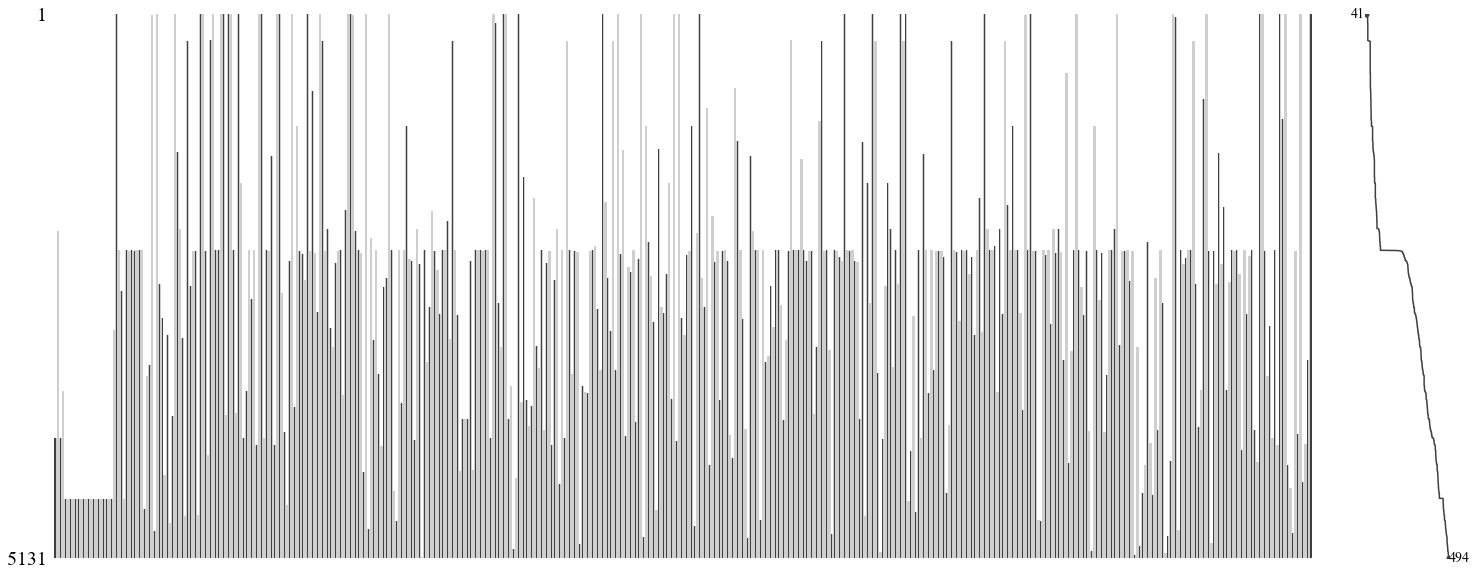

In [7]:
df_pivoted = pd.pivot_table(df_sorted, values='close', index='date', columns='symbol')
df_pivoted = df_pivoted.fillna(method="ffill")
msno.matrix(df_pivoted)
df_pivoted = df_pivoted
df_pivoted.head()

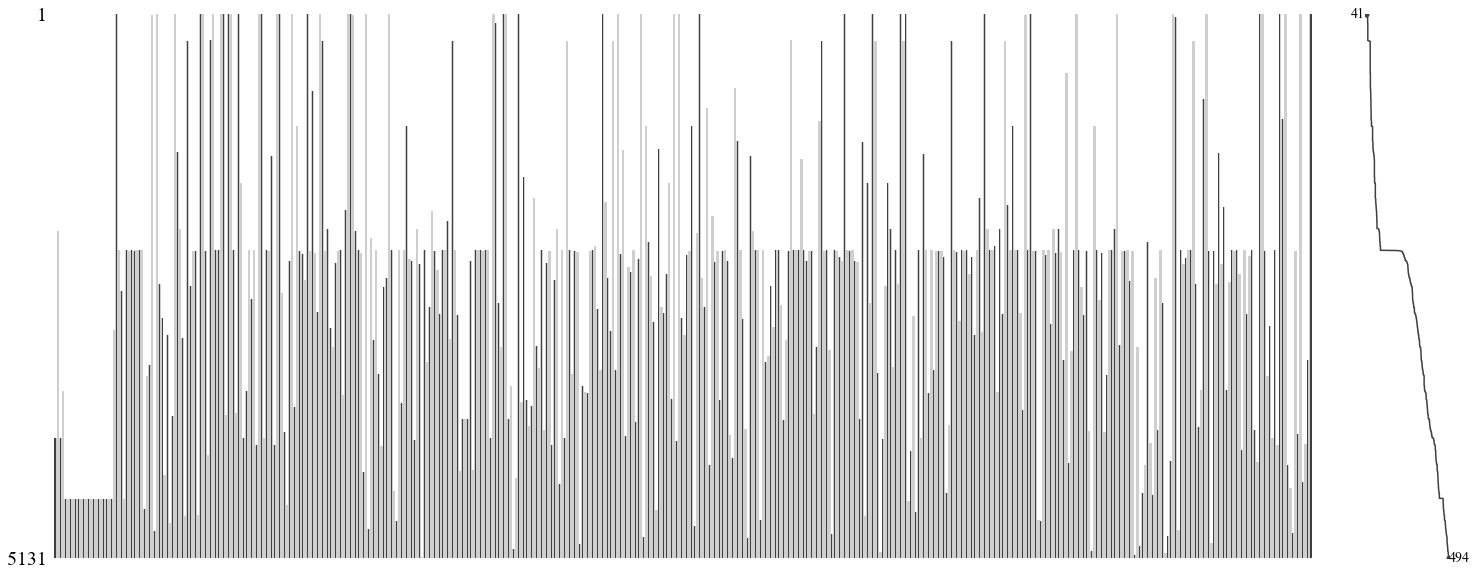

In [8]:
msno.matrix(df_pivoted)

### Calculating returns, standard deviations and sharpe ratios

In [9]:
df_rss = pd.DataFrame(columns=['Symbol', 'Annual Return', 'Standard Deviation', 'Sharpe Ratio']) 
for column in df_pivoted.columns:
    if len(df_pivoted[column].dropna()) > 502: 
        ann_return = (((1+df_pivoted[column].dropna().pct_change(1)).cumprod().iloc[-1])**(251/len(df_pivoted[column].dropna()))) -1 
        ann_std = df_pivoted[column].dropna().pct_change(1).std() * (252**.5)
        shrp = (ann_return - rf_rate) / ann_std
        df_rss = df_rss.append({'Symbol': column, 'Annual Return': ann_return, 'Standard Deviation': ann_std, 'Sharpe Ratio': shrp}, ignore_index= True)
df_rss = df_rss.set_index('Symbol')
top_50 = df_rss.sort_values('Sharpe Ratio', ascending= False).iloc[:15]
top_50_symbol = top_50.index.unique()
top_50

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
AZIZPIPES,0.581232,0.510512,0.957729
JMISMDL,0.551840,0.489950,0.937933
NORTHERN,0.459801,0.563777,0.651855
UPGDCL,0.288286,0.365512,0.536197
03.Ceramics_Sector,0.792906,1.486791,0.471220
BANGLAPRO,0.166623,0.167799,0.442928
10.Jute,0.576506,1.205987,0.401502
ROSEHEAVEN,0.231614,0.347704,0.400668
LEGACYFOOT,0.340893,0.638265,0.389482


In [10]:
top_50.to_clipboard()

In [11]:
df_corr_cov = df_pivoted.loc[:,top_50_symbol]
df_corr_cov = df_corr_cov.fillna(method='ffill')

In [12]:
corr_matrix= df_corr_cov.pct_change().corr()

In [13]:
corr_matrix.to_clipboard()

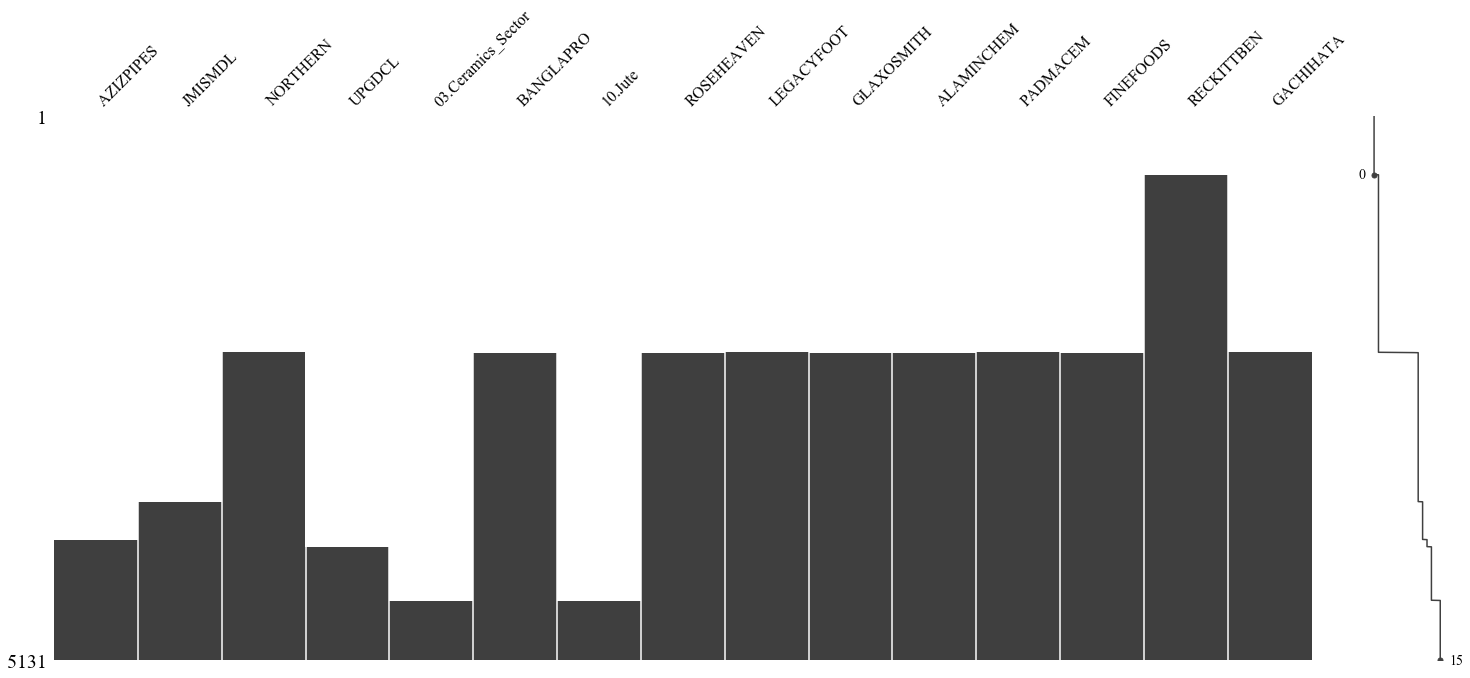

In [14]:
msno.matrix(df_corr_cov)

### Selected Risky Assets

In [15]:
def Portfolio_Return(returns, stds, weights, cov):
    port_df= pd.DataFrame()
    for each in weights:
        port_return = each*returns[0]+(1 - each)*returns[1]
        port_std = np.sqrt(np.square(each*stds[0]) + np.square((1-each)*stds[1]) + 2*each*(1-each)*cov) 
        port_shrp = (port_return - rf_rate ) / port_std
        port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
    return port_df

In [16]:
risky_assets = ['UPGDCL', 'MONNOSTAF']
port_assets = df_rss.loc[risky_assets, :]
port_assets.to_clipboard()
port_assets

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
UPGDCL,0.288286,0.365512,0.536197
MONNOSTAF,0.121988,0.656854,0.045197


In [17]:
correlation =  round(corr_matrix.loc[risky_assets,risky_assets ],2)
correlation.to_clipboard()
correlation

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Symbol,UPGDCL,MONNOSTAF
Symbol,,
UPGDCL,1.0,NaN
MONNOSTAF,NaN,NaN


In [18]:
#port_df = pd.DataFrame()
returns_assets = port_assets['Annual Return']
std_assets = port_assets['Standard Deviation']
cov = df_pivoted[risky_assets].pct_change(1).cov().loc[risky_assets[0], risky_assets[1]]
weights = pd.Series(np.arange(0,1.01,.05))
port_df = Portfolio_Return(returns_assets, std_assets, weights, cov)
#weights = pd.Series(np.arange(0,1.01,.01))
#for each in weights:
#    port_return = each*returns_assets[0]+(1 - each)*returns_assets[1]
#    port_std = np.sqrt(np.square(each*std_assets[0]) + np.square((1-each)*std_assets[1]) + 2*each*(1-each)*cov) 
#    port_shrp = (port_return - rf_rate ) / port_std
#    port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
port_df.to_clipboard()
port_df

,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.121988,0.045197,0.656854,0.00,1.00
1,0.130302,0.060874,0.624280,0.05,0.95
2,0.138617,0.078199,0.592299,0.10,0.90
3,0.146932,0.097382,0.561014,0.15,0.85
4,0.155247,0.118646,0.530546,0.20,0.80
5,0.163562,0.142227,0.501047,0.25,0.75
6,0.171877,0.168347,0.472696,0.30,0.70
7,0.180192,0.197194,0.445714,0.35,0.65
8,0.188507,0.228867,0.420363,0.40,0.60
9,0.196822,0.263309,0.396956,0.45,0.55


In [19]:
optimal = port_df.loc[port_df['Portfolio Sharpe Ratio'].idxmax()]
rp_var = (optimal['Portfolio Return'] - rf_rate)/ optimal['Portfolio Std']**2
optimal = optimal.append(pd.Series([rp_var], index=['Risk Premium to VAR']))
optimal = round(optimal, 2)
optimal.to_clipboard()
optimal

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\pandas\io\clipboards.py:117: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  obj.to_csv(buf, sep=sep, encoding="utf-8", **kwargs)


Portfolio Return          0.28
Portfolio Sharpe Ratio    0.54
Portfolio Std             0.35
Weights R                 0.95
Weights S                 0.05
Risk Premium to VAR       1.54
dtype: float64

In [20]:
y = round(optimal['Risk Premium to VAR']/ coeff_A, 2)
y

0.5

Text(0, 0.5, 'Portfolio Return')

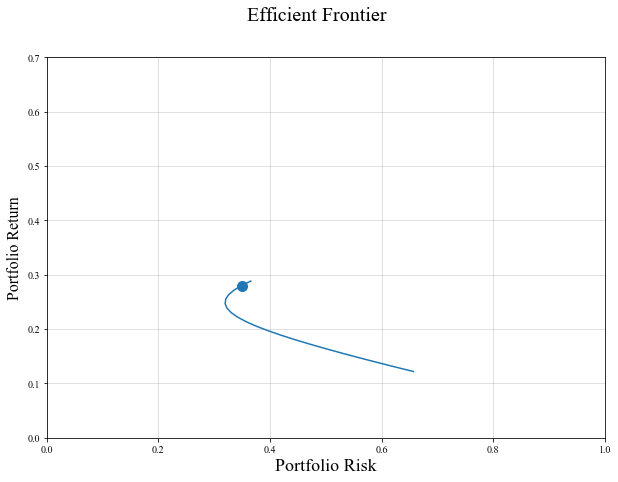

In [21]:
fig = plt.figure(figsize=(10, 7))
plt.grid(which='minor', alpha=.2)
plt.grid(which='major', alpha=.5)
plt.ylim(0, .7)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
fig.suptitle('Efficient Frontier', fontsize=20)
#text = "optimal portfolio"+str((optimal['Portfolio Std'], optimal['Portfolio Return']))
#plt.text(optimal['Portfolio Std']-.03, optimal['Portfolio Return']+.04,text , fontsize=14)
plt.xlabel('Portfolio Risk', fontsize=18)
plt.ylabel('Portfolio Return', fontsize=16)

Text(0.02, 0.09, 'Risk Free Return')

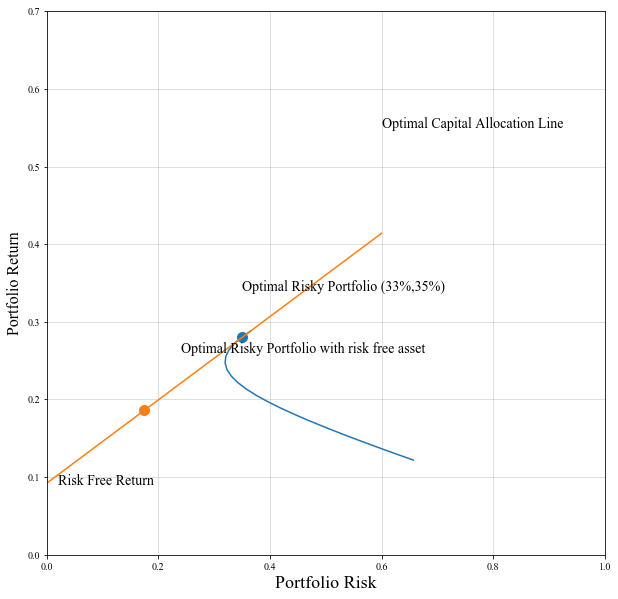

In [22]:
plt.figure(figsize=(10, 10))
plt.grid(which='minor', alpha=.2)
plt.grid(which='major', alpha=.5)
plt.ylim(0, .7)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
polynomial = np.poly1d(np.polyfit([0,optimal['Portfolio Std']], [rf_rate,optimal['Portfolio Return']], 1))
x_axis = np.linspace(0,.60)
y_axis = polynomial(x_axis)
plt.plot(x_axis, y_axis)
plt.scatter(optimal['Portfolio Std']*y,polynomial(optimal['Portfolio Std']*y), s=100)
plt.xlabel('Portfolio Risk', fontsize=18)
plt.ylabel('Portfolio Return', fontsize=16)
fig.suptitle('Optimal Capital Allocation Line', fontsize=20)
plt.text(.35,.34,"Optimal Risky Portfolio (33%,35%)", fontsize=14)
plt.text(.24,.26,"Optimal Risky Portfolio with risk free asset ", fontsize=14)
plt.text(.6,.55,"Optimal Capital Allocation Line", fontsize=14)
plt.text(.02,.09,"Risk Free Return", fontsize=14)

In [23]:
port_df

,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.121988,0.045197,0.656854,0.00,1.00
1,0.130302,0.060874,0.624280,0.05,0.95
2,0.138617,0.078199,0.592299,0.10,0.90
3,0.146932,0.097382,0.561014,0.15,0.85
4,0.155247,0.118646,0.530546,0.20,0.80
5,0.163562,0.142227,0.501047,0.25,0.75
6,0.171877,0.168347,0.472696,0.30,0.70
7,0.180192,0.197194,0.445714,0.35,0.65
8,0.188507,0.228867,0.420363,0.40,0.60
9,0.196822,0.263309,0.396956,0.45,0.55


In [24]:
returns_rf = pd.Series([optimal['Portfolio Return'], rf_rate])
std_rf = pd.Series([optimal['Portfolio Std'], 0])
wt = pd.Series(np.arange(0, 1.6, .05))

Risk_Portfolio_rf = Portfolio_Return(returns_rf, std_rf, wt, cov)
Risk_Portfolio_rf

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.092300,NaN,0.000000,0.00,1.00
1,0.101685,0.535522,0.017525,0.05,0.95
2,0.111070,0.535923,0.035024,0.10,0.90
3,0.120455,0.536057,0.052522,0.15,0.85
4,0.129840,0.536125,0.070021,0.20,0.80
5,0.139225,0.536165,0.087520,0.25,0.75
6,0.148610,0.536192,0.105018,0.30,0.70
7,0.157995,0.536211,0.122517,0.35,0.65
8,0.167380,0.536225,0.140016,0.40,0.60
9,0.176765,0.536236,0.157514,0.45,0.55


In [25]:
sectors = pd.read_csv('./companies-by-industry.csv')
sectors = sectors.drop(sectors.columns[[0,5]], axis=1)
sectors.columns.values

array(['Bank', 'Cement', 'Ceramics Sector', 'Corporate Bond',
       'Engineering', 'Financial Institutions', 'Food & Allied',
       'Fuel & Power', 'Insurance', 'IT Sector', 'Jute', 'Miscellaneous',
       'Mutual Funds', 'Paper & Printing', 'Pharmaceuticals & Chemicals',
       'Services & Real Estate', 'Tannery Industries',
       'Telecommunication', 'Textile', 'Travel & Leisure'], dtype=object)

engineering_df = df_rss.loc[eng_companies, :]
engineering_df = engineering_df.dropna(axis=0)
engineering_df['Annual Return'].mean()
engineering_df

In [26]:
df_pivoted[['ABBANK', 'ALARABANK', 'BANKASIA', 'BRACBANK', 'CITYBANK',
       'DHAKABANK', 'DUTCHBANGL', 'EBL', 'EXIMBANK', 'FIRSTSBANK',
       'ICBIBANK', 'IFIC', 'ISLAMIBANK', 'JAMUNABANK', 'MERCANBANK',
       'MTB', 'NBL', 'NCCBANK', 'ONEBANKLTD', 'PREMIERBAN', 'PRIMEBANK',
       'PUBALIBANK', 'RUPALIBANK', 'SHAHJABANK', 'SIBL', 'SOUTHEASTB',
       'STANDBANKL', 'TRUSTBANK', 'UCB', 'UTTARABANK']].dropna().to_clipboard()

### Each Sector Return

In [27]:
sector_return = pd.DataFrame(columns=['Sector', 'Annual Return', 'Risk'])
n=0
for sector in sectors.columns.values:
    n += 1
    print(n)
    companies = sectors[sector].dropna().values
    return_df = df_rss.loc[companies, :] 
    average_return = round(return_df['Annual Return'].mean(), 4)
    average_std = round(np.square(return_df['Standard Deviation']).mean(), 4)
    sector_return = sector_return.append({'Sector':sector, 'Annual Return': average_return, 'Risk': average_std}, ignore_index= True)
sector_return.to_clipboard()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [30]:
df_pivoted.to_csv('./stocks-pivoted-dataframe.csv')